# Solids of Revolution

Solids of revolution are three-dimensional objects obtained by rotating a two-dimensional curve around an axis. When a function $ f(x) $ is revolved around the x-axis or y-axis, the resulting shape is called a solid of revolution. These solids can be analyzed and visualized using integral calculus to determine properties such as volume and surface area.

## Importing the Libraries

In [40]:
from IPython.display import display, Math, Markdown
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Defining the function and the interval

The function $ f $ and the interval $ [a, b] $ are defined as follows:

- Function: $ f: x\mapsto x^2 $
- Interval: $ [0, 1] $

However, feel free to modify these parameters as necessary


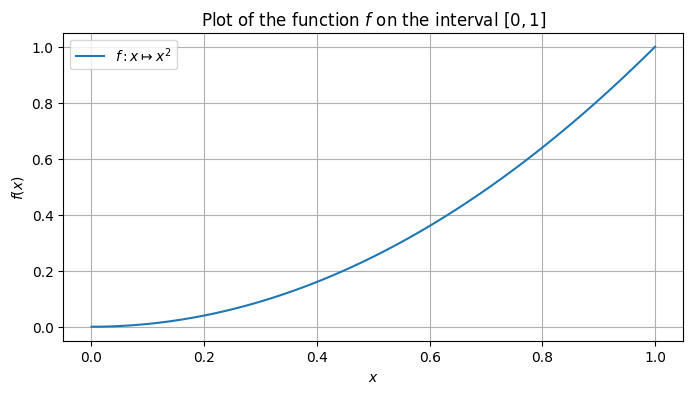

In [41]:

# Define the function and interval
# Feel free to change the function and interval
x = sp.symbols('x')
f = x**2  # Example function
a, b = 0, 1  # Example interval [a, b]

# Create a lambda function for numerical evaluation
f_lambdified = sp.lambdify(x, f, 'numpy')

# Generate data points for the function
x_vals = np.linspace(float(a), float(b), 100)
y_vals = f_lambdified(x_vals)

# Plot the function on its interval
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label=f'$f:x\mapsto {sp.latex(f)}$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title(f'Plot of the function $f$ on the interval $[{a}, {b}]$')
plt.legend()
plt.grid(True)
plt.show()



## Plotting the Solids of Revolution

In this section, we will visualize the solids of revolution generated by rotating the function $ f: x\mapsto x^2 $ around the x-axis and y-axis. The general parametric equations for these solids are derived from the function $ f $.

### Solid of Revolution around the x-axis
The parametric equations for the solid of revolution around the x-axis are:
$$
\begin{cases}
x = u \\
y = f(u) \cos(v) \\
z = f(u) \sin(v)
\end{cases}
$$
where $ u $ ranges over the interval $[a, b]$ and $ v $ ranges from $ 0 $ to $ 2\pi $.

### Solid of Revolution around the y-axis
The parametric equations for the solid of revolution around the y-axis are:
$$
\begin{cases}
x = u \cos(v) \\
y = f(u) \\
z = u \sin(v)
\end{cases}
$$
where $ u $ ranges over the interval $[a, b]$ and $ v $ ranges from $ 0 $ to $ 2\pi $.


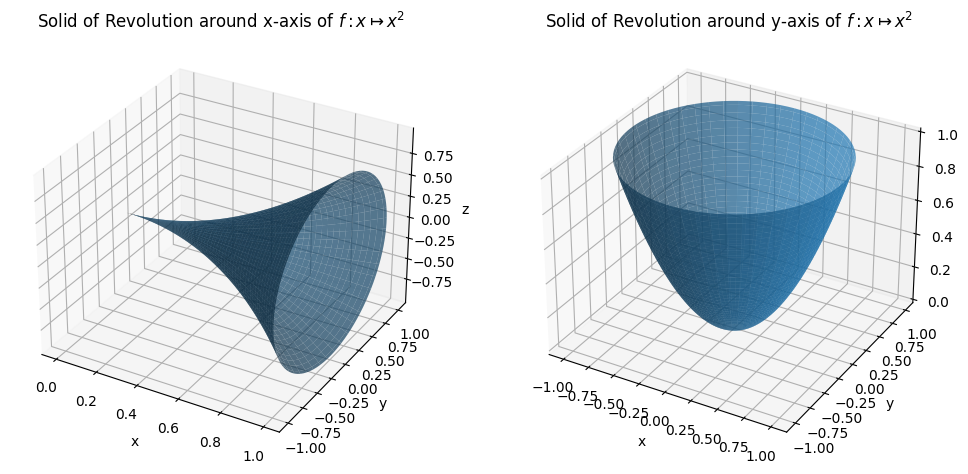

In [42]:

# Plot the solid of revolution around the x-axis
fig = plt.figure(figsize=(12, 6))

# Plot around x-axis
ax1 = fig.add_subplot(121, projection='3d')
X, Z = np.meshgrid(x_vals, np.linspace(-1, 1, 100))
Y = f_lambdified(X)
ax1.plot_surface(X, Y * np.cos(Z * np.pi), Y * np.sin(Z * np.pi), alpha=0.7)
ax1.set_title(f'Solid of Revolution around x-axis of $f:x\mapsto {sp.latex(f)}$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Plot around y-axis
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X * np.cos(Z * np.pi), X * np.sin(Z * np.pi), Y, alpha=0.7)
ax2.set_title(f'Solid of Revolution around y-axis of $f:x\mapsto {sp.latex(f)}$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

plt.show()

## Computing the Volume
The volume of a solid of revolution can be computed using integral calculus. For a function $ f $ rotated around the x-axis, the volume $ V_x $ is given by:

$$
V_x = \pi \int_{a}^{b} [f(x)]^2 \, dx
$$

For a function $ f $ rotated around the y-axis, the volume $ V_y $ is given by:

$$
V_y = 2\pi \int_{a}^{b} x \cdot f(x) \, dx
$$



In [43]:
# Compute the volume of the solid of revolution around the x-axis
volume_x_axis = sp.integrate(sp.pi * f**2, (x, a, b))
print(f"Volume of the solid of revolution around the x-axis:")
display(Math(f"\\int_{{{a}}}^{{{b}}} \\pi [f(x)]^2 dx =\\int_{{{a}}}^{{{b}}} \\pi [{sp.latex(f)}]^2 dx = {sp.latex(volume_x_axis)}"))


# Compute the volume of the solid of revolution around the y-axis
volume_y_axis = sp.integrate(2 * sp.pi * x * f, (x, a, b))
print(f"Volume of the solid of revolution around the y-axis:")
display(Math(f"\\int_{{{a}}}^{{{b}}} 2\\pi x f(x) dx =\\int_{{{a}}}^{{{b}}} 2\\pi x {sp.latex(f)} dx = {sp.latex(volume_y_axis)}"))

Volume of the solid of revolution around the x-axis:


<IPython.core.display.Math object>

Volume of the solid of revolution around the y-axis:


<IPython.core.display.Math object>

## Computing the Surface

To compute the surface area of a solid of revolution, we use integral calculus. The surface area depends on whether the function is rotated around the x-axis or the y-axis.

### Surface Area of Revolution around the x-axis
The surface area $ S_x $ of a solid of revolution generated by rotating a function $ f $ around the x-axis is given by:
$$
S_x = 2\pi \int_{a}^{b} f(x) \sqrt{1 + \left(\frac{df}{dx}\right)^2} \, dx
$$

### Surface Area of Revolution around the y-axis
The surface area $ S_y $ of a solid of revolution generated by rotating a function $ f $ around the y-axis is given by:
$$
S_y = 2\pi \int_{a}^{b} x \sqrt{1 + \left(\frac{df}{dx}\right)^2} \, dx
$$

In these formulas:
- $ f $ is the function being rotated.
- $ \frac{df}{dx} $ is the derivative of the function.
- $ [a, b] $ is the interval over which the function is defined.

The integrals calculate the surface area by summing up infinitesimally small surface elements generated by the rotation of the function around the specified axis.

In [44]:
# Compute the derivative of the function
f_prime = sp.diff(f, x)

# Compute the surface area of the solid of revolution around the x-axis
surface_x_axis = sp.integrate(2 * sp.pi * f * sp.sqrt(1 + f_prime**2), (x, a, b))
print(f"Surface area of the solid of revolution around the x-axis:")
display(Math(f"2\\pi \\int_{{{a}}}^{{{b}}} f(x) \\sqrt{{1 + \\left(\\frac{{df}}{{dx}}\\right)^2}} \\, dx = 2\\pi \\int_{{{a}}}^{{{b}}} {sp.latex(f)} \\sqrt{{1 + \\left({sp.latex(f_prime)}\\right)^2}} \\, dx = {sp.latex(surface_x_axis)}"))

# Compute the surface area of the solid of revolution around the y-axis
surface_y_axis = sp.integrate(2 * sp.pi * x * sp.sqrt(1 + f_prime**2), (x, a, b))
print(f"Surface area of the solid of revolution around the y-axis:")
display(Math(f"2\\pi \\int_{{{a}}}^{{{b}}} x \\sqrt{{1 + \\left(\\frac{{df}}{{dx}}\\right)^2}} \\, dx = 2\\pi \\int_{{{a}}}^{{{b}}} x \\sqrt{{1 + \\left({sp.latex(f_prime)}\\right)^2}} \\, dx = {sp.latex(surface_y_axis)}"))

Surface area of the solid of revolution around the x-axis:


<IPython.core.display.Math object>

Surface area of the solid of revolution around the y-axis:


<IPython.core.display.Math object>

## Practice

In this practice section, you will compute the volume and surface area of a given solid of revolution. Follow the steps below:

1. **Define the function and interval**: Choose a function $ g(x) $ and an interval $[c, d]$:

    - Function: $ g_1(x) = x^3 $, Interval: $[0, 1]$
    - Function: $ g_2(x) = \sin(x) $, Interval: $[0, \pi]$
    - Function: $ g_3(x) = e^x $, Interval: $[0, 1]$
    - Function: $ g_4(x) = \sqrt{x} $, Interval: $[0, 1]$

2. **Compute the volume**:
    - Compute the volume of the solid of revolution around the x-axis using the formula:
      $$
      V_x = \pi \int_{c}^{d} [g(x)]^2 \, dx
      $$
    - Compute the volume of the solid of revolution around the y-axis using the formula:
      $$
      V_y = 2\pi \int_{c}^{d} x \cdot g(x) \, dx
      $$

3. **Compute the surface area**:
    - Compute the surface area of the solid of revolution around the x-axis using the formula:
      $$
      S_x = 2\pi \int_{c}^{d} g(x) \sqrt{1 + \left(\frac{dg}{dx}\right)^2} \, dx
      $$
    - Compute the surface area of the solid of revolution around the y-axis using the formula:
      $$
      S_y = 2\pi \int_{c}^{d} x \sqrt{1 + \left(\frac{dg}{dx}\right)^2} \, dx
      $$

4. **Validate your results**: Use the notebook to validate your computed volume and surface area by comparing them with the results obtained using SymPy.




In [45]:
# Your code here